# Machine learning project  

## Introduction

In this project, an implementation of the backpropagation algorithm for neural networks is made and applied to the task of [`micro_PCB`](https://www.kaggle.com/frettapper/micropcb-images) recognition. This project is made for the machine learning course [`Machine learning`](https://uhintra03.uhasselt.be/studiegidswww/opleidingsonderdeel.aspx?a=2021&i=4483&n=4&t=04) given at the joint training of kuleuven and uhasselt. The authors of this project are Molenaers Arno and Purnal Lennert.


The libraries that need to be imported for this project are the following:
- [`numpy`](http://www.numpy.org/) for all arrays and matrix operations.
- [`matplotlib`](https://matplotlib.org/) for plotting.
- [`scipy`](https://docs.scipy.org/doc/scipy/reference/) for scientific and numerical computation functions and tools.
- [`csv`](https://docs.python.org/3/library/csv.html) for importing the image data
- [`utils`]() utilities from exercise 4 from the coursera machine learning course
- [`math`](https://docs.python.org/3/library/math.html) math library used for functions like square root

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# math library 
import math

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# Used for imorting csv data
import csv

# utilies library from the exercises of the machine learning course
import utils

# custom made functions for this Machine Learning dataset
import customUtils as cu

#used for timing the optimizations
from timeit import default_timer as timer 

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# used for importing/exporting matlab data
from scipy.io import savemat
from scipy.io import loadmat

## importing the training data
the training data is imported from a csv file. The X matrix contains the input features as a '6500x7500' matrix. y is a matrix containing the labels, for the neural network each label is encoded as a 13 dimensional vector with a 1 at the corresponding correct label and the other elements set to 0, making y a '6500x13' vector.
> do not forget to specify the correct path to the csv file and to set the size of the imported data as well as the resolution of the images

In [2]:
X, y = cu.importImageDataFromCSV('../channeldata/channeldata50x50train.csv', data_size=6500)
X = X / 255.0
# matlab function
#X, y = importImageTrainDataFromMatlab('dataset.mat', data_size=6500)

In [3]:
X_test, y_test = cu.importImageDataFromCSV('../channeldata/channeldata50x50test.csv', data_size=1625)
X_test = X_test / 255.0
# matlab function
#X_test, y_test = importImageTestDataFromMatlab('dataset.mat', data_size=1625)

## cost function 
The cost funtion used is as follows:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K} \left[ - y_k^{(i)} \log \left( \left( h_\theta \left( x^{(i)} \right) \right)_k \right) - \left( 1 - y_k^{(i)} \right) \log \left( 1 - \left( h_\theta \left( x^{(i)} \right) \right)_k \right) \right] + \frac{\lambda}{2 m} \left[ \sum_{j=1}^{sl+1} \sum_{k=1}^{sl} \left( \Theta_{j,k}^{(1)} \right)^2 + \sum_{j=1}^{sl+1} \sum_{k=1}^{sl} \left( \Theta_{j,k}^{(2)} \right)^2 \right] $$


## initializing the theta parameters and hyperparameters
The theta parameters must be initialized in a random way to avoid symmetry.

In the random initialize function the following value for epsilon is used:

$$\epsilon_{init} = \frac{\sqrt{6}}{\sqrt{L_{in} + L_{out}}}$$

In [ ]:
num_layers = 3
input_layer_size = X.shape[1]
hidden_layer_size = 10000
num_labels = y.shape[1]

#choose a lambda
lambda_ = 0

In [ ]:
eps1 = math.sqrt(6)/math.sqrt(input_layer_size + hidden_layer_size)
eps2 = math.sqrt(6)/math.sqrt(hidden_layer_size + num_labels)
print('epsilon init 1 = ' + str(eps1))
print('epsilon init 2 = ' + str(eps2))

initial_Theta1 = cu.randInitializeWeights(input_layer_size, hidden_layer_size, eps1)
initial_Theta2 = cu.randInitializeWeights(hidden_layer_size, num_labels, eps2)

initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

## learing the parameters with `scipy.optimize.minimize`
next we will use the scipy.optimize.minimize function to minimize the randomly initialized parameters.

In [ ]:
# we initialize the minimize function options
options = {'maxiter':50, 'disp':True}

#creating a lambda function for the cost function
costFunction = lambda p: cu.nnCostFunction(p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels, X, y, lambda_)

# execute the optimization function
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

# get the solution parameters
nn_params = res.x

#reshape nn_params to retrieve the seperate theta matrixes 
Theta1, Theta2 = cu.retrieveThetas(nn_params, input_layer_size, hidden_layer_size, num_labels)

In [ ]:
#retrieve the theta's from nn_params
Theta1, Theta2 = cu.retrieveThetas(nn_params, input_layer_size, hidden_layer_size, num_labels)

## checking the cost function and the gradients
next we will verify the outcome of the cost function

In [ ]:
J, grads = cu.nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                      num_labels, X, y, lambda_)

print('Cost at parameters: %.6f' % J)

## try the trained neural network on the training data
the trained parameters are used to recognize the `micro PCB` in the images from the training data itself. This is a first test to check if the trained parameters can be correct. To get an actual idea of the accuracy of the neural network, check te next segment where the same predictions are done on the test data.

In [ ]:
pred = utils.predict(Theta1, Theta2, X)
y_vec = np.zeros(y.shape[0])


for j in range(0,y.shape[0]):
    y_vec[j] = np.where(y[j,:] == 1)[0][0]
    print("y = " + str(y_vec[j]) + " <=> pred = " + str(pred[j]))

print('Training Set Accuracy: %f' % (np.mean(pred == y_vec) * 100))

## try the trained neural network on the test data
The accuracy of the neural network is tested on the test data.

In [ ]:
pred_test = utils.predict(Theta1, Theta2, X_test)
y_test_vec = np.zeros(y_test.shape[0])

for j in range(y_test_vec.shape[0]):
    y_test_vec[j] = np.where(y_test[j,:] == 1)[0][0]
    print("y = " + str(y_test_vec[j]) + " <=> pred = " + str(pred_test[j]))

print('Test Set Accuracy: %f' % (np.mean(pred_test == y_test_vec) * 100))

## save/retrieve the theta values to/from mat file
after minimizing theta it might be useful to save the values to a mat. The naming of the output files is `nnParameters_xL_y_lmZ.mat` where x is the number of layers and y is the number of nodes in the hidden layer(s) and Z is the chosen lambda.
> do not forget to set the correct name/path for the output file as pleased

In [ ]:
filename = '../nnParameters_norm/nnParameters_' + str(num_layers) +'L_' + str(hidden_layer_size) + '_lm' + str(lambda_) +'.mat'
matcontent = {"Theta1": Theta1, "Theta2": Theta2}
savemat(filename, matcontent)

In [ ]:
filename = '../nnParameters_norm/nnParameters_' + str(num_layers) +'L_' + str(hidden_layer_size) + '_lm' + str(lambda_) +'.mat'
Thetas = loadmat(filename)
Theta1, Theta2 = Thetas['Theta1'], Thetas['Theta2']

## Bias/Variance diagnosing
In this section bias/variance is diagnosed by varying the `hidden layer size` as well as the `lambda` parameter. The error values are saved to a CSV named `diagnosing.csv`

In [51]:
# we initialize the minimize function options
options = {'maxiter':200, 'disp':True}

num_layers = 3
input_layer_size = X.shape[1]
num_labels = y.shape[1]

#list of lambda values to be tested
lambda_list = [0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

#hidden layer size list
HLS_list = [50]

In [40]:
error_train = np.zeros((len(HLS_list), len(lambda_list)))
error_test = np.zeros((len(HLS_list), len(lambda_list)))

#with open('diagnosing3L.csv', 'a', newline='') as csvfile:
#    fieldnames = ['HLS', 'lambda', 'trainError', 'testError']
#    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#    writer.writeheader()
    
i = 0
for HLS in HLS_list:
    j = 0

    eps1 = math.sqrt(6)/math.sqrt(input_layer_size + HLS)
    eps2 = math.sqrt(6)/math.sqrt(HLS + num_labels)

    initial_Theta1 = cu.randInitializeWeights(input_layer_size, HLS, eps1)
    initial_Theta2 = cu.randInitializeWeights(HLS, num_labels, eps2)

    initial_nn_params_start = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

    for lambda_val in lambda_list:
        filename = '../nnParameters_norm/nnParameters_' + str(num_layers) +'L_' + str(HLS) + '_lm' + str(lambda_val) +'.mat'
        if os.path.exists(filename):
            print("loading existing thetas")
            Thetas = loadmat(filename)
            Theta1, Theta2 = Thetas['Theta1'], Thetas['Theta2']
            initial_nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()], axis=0)
        else:
            initial_nn_params =  initial_nn_params_start
        
        #creating a lambda function for the cost function
        costFunction = lambda p: cu.nnCostFunction(p, input_layer_size,
                                                HLS,
                                                num_labels, X, y, lambda_val)

        print("running optimize.minimize for HLS = " + str(HLS) + " and lambda = " + str(lambda_val))
        start = timer()

        # execute the optimization function
        res = optimize.minimize(costFunction,
                                initial_nn_params,
                                jac=True,
                                method='TNC',
                                options=options)

        print("done optimizing, run time was " + str(timer()-start))
        #get the solution parameters
        nn_params = res.x

        #reshape nn_params to retrieve the seperate theta matrixes 
        Theta1 , Theta2 = cu.retrieveThetas(nn_params, input_layer_size, HLS, num_labels)

        #calculate error on training set
        error_train[i,j], _ = cu.nnCostFunction(nn_params, input_layer_size, HLS, num_labels, X, y, lambda_=0)
        #calculate error on test set
        error_test[i,j], _ = cu.nnCostFunction(nn_params, input_layer_size, HLS, num_labels, X_test, y_test, lambda_=0)
        print("train error = " + str(error_train[i,j]) + ' and test error = ' + str(error_test[i,j]))
        
        #print('saving theta values to MAT file')
        print("writing" + filename)
        matcontent = {"Theta1": Theta1, "Theta2": Theta2}
        savemat(filename, matcontent)

        #set j for next loop
        j += 1
    #set i for next loop
    i += 1

loading existing thetas
running optimize.minimize for HLS = 50 and lambda = 0
done optimizing, run time was 223.13358699999662
train error = 0.005243735641351043 and test error = 0.5092003860489694
writing../nnParameters_norm/nnParameters_3L_50_lm0.mat
loading existing thetas
running optimize.minimize for HLS = 50 and lambda = 0.01
done optimizing, run time was 225.032183000003
train error = 0.04169435682927594 and test error = 0.31850745831547217
writing../nnParameters_norm/nnParameters_3L_50_lm0.01.mat
loading existing thetas
running optimize.minimize for HLS = 50 and lambda = 0.03
done optimizing, run time was 216.45219740000175
train error = 0.01163522253107431 and test error = 0.3650612314512381
writing../nnParameters_norm/nnParameters_3L_50_lm0.03.mat
loading existing thetas
running optimize.minimize for HLS = 50 and lambda = 0.1
done optimizing, run time was 183.4805603000059
train error = 0.024696570679591016 and test error = 0.40398801611335217
writing../nnParameters_norm/nnPa

In [52]:
i = 0
for HLS in HLS_list:
    j = 0
    for lambda_val in lambda_list:
        filename = '../nnParameters_norm/nnParameters_' + str(num_layers) +'L_' + str(HLS) + '_lm' + str(lambda_val) +'.mat'
        #Theta1, Theta2 = cu.thetasFromCSV(filePath, (HLS,(X.shape[1]+1)), (y.shape[1],(HLS+1))) 
        Thetas = loadmat(filename)
        Theta1, Theta2 = Thetas['Theta1'], Thetas['Theta2']
        
        print('prediction accuracy for lambda = ' + str(lambda_val) + ' and HLS = ' + str(HLS))
        
        pred = utils.predict(Theta1, Theta2, X)

        y_vec = np.zeros(y.shape[0])
        for j in range(0,y.shape[0]):
            y_vec[j] = np.where(y[j,:] == 1)[0][0]

        print('Training Set Accuracy: %f' % (np.mean(pred == y_vec) * 100))
        
        pred_test = utils.predict(Theta1, Theta2, X_test)
        y_test_vec = np.zeros(y_test.shape[0])

        for j in range(y_test_vec.shape[0]):
            y_test_vec[j] = np.where(y_test[j,:] == 1)[0][0]

        print('Test Set Accuracy: %f' % (np.mean(pred_test == y_test_vec) * 100))

prediction accuracy for lambda = 0 and HLS = 50
Training Set Accuracy: 100.000000
Test Set Accuracy: 94.707692
prediction accuracy for lambda = 0.01 and HLS = 50
Training Set Accuracy: 100.000000
Test Set Accuracy: 96.307692
prediction accuracy for lambda = 0.03 and HLS = 50
Training Set Accuracy: 99.953846
Test Set Accuracy: 96.307692
prediction accuracy for lambda = 0.1 and HLS = 50
Training Set Accuracy: 99.938462
Test Set Accuracy: 95.200000
prediction accuracy for lambda = 0.3 and HLS = 50
Training Set Accuracy: 100.000000
Test Set Accuracy: 96.369231
prediction accuracy for lambda = 1 and HLS = 50
Training Set Accuracy: 100.000000
Test Set Accuracy: 97.600000
prediction accuracy for lambda = 3 and HLS = 50
Training Set Accuracy: 100.000000
Test Set Accuracy: 98.215385
prediction accuracy for lambda = 10 and HLS = 50
Training Set Accuracy: 100.000000
Test Set Accuracy: 97.415385
prediction accuracy for lambda = 30 and HLS = 50
Training Set Accuracy: 99.892308
Test Set Accuracy: 97

### evaluating the trained models
In this section the trained models are evaluated (cost calculated without regularisation) for the training set as well as the test set. These values are saved in a csv file.

In [53]:
i = 0
for HLS in HLS_list:
    j = 0
    for lambda_val in lambda_list:
        filename = '../nnParameters_norm/nnParameters_' + str(num_layers) +'L_' + str(HLS) + '_lm' + str(lambda_val) +'.mat'
        if os.path.exists(filename):
            Thetas = loadmat(filename)
            Theta1, Theta2 = Thetas['Theta1'], Thetas['Theta2']

            nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])
            
            #calculate error on training set
            error_train, _ = cu.nnCostFunction(nn_params, input_layer_size, HLS, num_labels, X, y, lambda_=0)
            #calculate error on test set
            error_test, _ = cu.nnCostFunction(nn_params, input_layer_size, HLS, num_labels, X_test, y_test, lambda_=0)
            print(" writing train error = " + str(error_train) + ' and test error = '
                  + str(error_test) + ' for HLS ' + str(HLS) + ' and lambda ' + str(lambda_val))

            with open('diagnosing3L_norm.csv', 'a', newline='') as csvfile:
                fieldnames = ['HLS', 'lambda', 'trainError', 'testError']
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                #save the values to CSV
                writer.writerow({'HLS': HLS, 'lambda': lambda_val, 'trainError': error_train, 'testError': error_test})


 writing train error = 0.005243735641351043 and test error = 0.5092003860489694 for HLS 50 and lambda 0
 writing train error = 0.04169435682927594 and test error = 0.31850745831547217 for HLS 50 and lambda 0.01
 writing train error = 0.01163522253107431 and test error = 0.3650612314512381 for HLS 50 and lambda 0.03
 writing train error = 0.024696570679591016 and test error = 0.40398801611335217 for HLS 50 and lambda 0.1
 writing train error = 0.021898098310110335 and test error = 0.29976354765657526 for HLS 50 and lambda 0.3
 writing train error = 0.0664274811046541 and test error = 0.2726567632330332 for HLS 50 and lambda 1
 writing train error = 0.09029094186250418 and test error = 0.2669961794160561 for HLS 50 and lambda 3
 writing train error = 0.33095722951536505 and test error = 0.5455630708855441 for HLS 50 and lambda 10
 writing train error = 0.6264083796113746 and test error = 0.8400902999370247 for HLS 50 and lambda 30
 writing train error = 1.4858897093296557 and test error 

### plotting the evaluation data
#### error vs amount of parameters (HLS) plot 
train error and test error are plotted for a chosen lambda with varying hidden layer size.

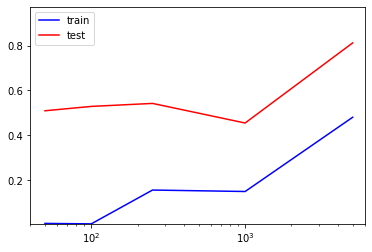

In [62]:
train_error = []
test_error = []
HLS_array = []

with open('diagnosing3L_norm.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if float(row['lambda']) == 0:
            train_error.append(float(row['trainError']))
            test_error.append(float(row['testError']))
            HLS_array.append(int(row['HLS']))
#sort the array
HLS_array, train_error, test_error = zip(*sorted(zip(HLS_array, train_error, test_error)))
            
pyplot.plot(HLS_array, train_error, 'b')
pyplot.plot(HLS_array, test_error, 'r')
pyplot.xscale('log')
pyplot.axis([min(HLS_array)*0.8, max(HLS_array)*1.2, min(min(train_error),min(test_error))*0.8, max(max(train_error),max(test_error))*1.2])
pyplot.legend(["train", "test"])
pyplot.show()

#### error vs lambda plot
train and test error are plotted vs lambda for a given hidden layer size. Be sure to set the desired HLS for the plot.

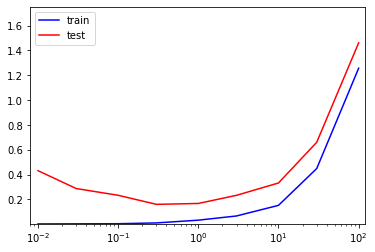

In [67]:
HLS = 100

train_error = []
test_error = []
lambda_array = []

with open('diagnosing3L_norm.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if int(row['HLS']) == HLS and float(row['lambda']) != 0:
            train_error.append(float(row['trainError']))
            test_error.append(float(row['testError']))
            lambda_array.append(float(row['lambda']))
#sort the array
lambda_array, train_error, test_error = zip(*sorted(zip(lambda_array, train_error, test_error)))

pyplot.plot(lambda_array, train_error, 'b')
pyplot.plot(lambda_array, test_error, 'r')
pyplot.axis([min(lambda_array)*0.8, max(lambda_array)*1.2, min(min(train_error),min(test_error))*0.8, max(max(train_error),max(test_error))*1.2])
pyplot.xscale('log')
pyplot.legend(["train", "test"])
pyplot.show()